## Problem-2

## Python Libraries

In [1]:
import pandas as pd
import numpy as np

#Date Importing
from datetime import datetime
from datetime import timedelta

#Library for Graphical Representation
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sn

#Library for Statistical Analysis
import scipy.stats as stats

# Date Time library
from datetime import datetime

#Machine learning Libraries
import statsmodels.api as sm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
ppp_150k_above_data=pd.read_csv('~/Downloads/public_150k_plus_220930.csv')
ppp_150k_above_data

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
0,9547507704,05/01/2020,464,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150-9662,12/18/2020,...,Corporation,19248,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,773553.37,11/20/2020
1,9777677704,05/01/2020,464,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420-9000,09/28/2021,...,Sole Proprietorship,19248,Synovus Bank,COLUMBUS,GA,Male Owned,Non-Veteran,NaN,746336.24,08/12/2021
2,5791407702,05/01/2020,1013,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112-2922,03/17/2021,...,Non-Profit Organization,9551,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,Y,696677.49,02/10/2021
3,6223567700,05/01/2020,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,10/16/2021,...,Corporation,9551,"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran,NaN,395264.11,09/10/2021
4,9662437702,05/01/2020,101,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,08/17/2021,...,NaN,57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,370819.35,04/08/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968526,4395967002,04/03/2020,897,PPP,"ROY E PAULSON, JR., P.C.",102 N. Kenwood,CASPER,WY,82601-2724,01/13/2021,...,Corporation,42366,Platte Valley Bank,TORRINGTON,WY,Male Owned,Non-Veteran,NaN,151037.50,12/09/2020
968527,6985647108,04/14/2020,897,PPP,"SWEETWATER COUNTY CHILD DEVELOPMENTAL CENTER, ...",1715 HITCHING POST DR,GREEN RIVER,WY,82935-5783,12/08/2020,...,Non-Profit Childcare Center,122813,NebraskaLand Bank,NORTH PLATTE,NE,Unanswered,Unanswered,Y,150789.04,11/03/2020
968528,7996438405,02/12/2021,897,PPS,ELECTRICAL SYSTEMS OF WYOMING INC,1105 Adon Rd,Rozet,WY,82727-8465,09/15/2021,...,Subchapter S Corporation,77189,First National Bank of Gillette,GILLETTE,WY,Female Owned,Unanswered,NaN,150743.84,08/17/2021
968529,9054647103,04/15/2020,897,PPP,EDEN LIFE CARE,30 N. Gould Street Suite 4000,SHERIDAN,WY,82801,03/08/2022,...,Corporation,25901,Small Business Bank,LENEXA,KS,Unanswered,Unanswered,NaN,152820.83,02/23/2022


In [3]:
ppp_150k_above_data.isna().sum()

LoanNumber                          0
DateApproved                        0
SBAOfficeCode                       0
ProcessingMethod                    0
BorrowerName                        4
BorrowerAddress                    14
BorrowerCity                       12
BorrowerState                      13
BorrowerZip                        13
LoanStatusDate                  45281
LoanStatus                          0
Term                                0
SBAGuarantyPercentage               0
InitialApprovalAmount               0
CurrentApprovalAmount               0
UndisbursedAmount                  50
FranchiseName                  933126
ServicingLenderLocationID           0
ServicingLenderName                 0
ServicingLenderAddress              0
ServicingLenderCity                 0
ServicingLenderState                0
ServicingLenderZip                  0
RuralUrbanIndicator                 0
HubzoneIndicator                    0
LMIIndicator                        0
BusinessAgeD

In [4]:
# Dropping (or) Removing non_useful columns from the data
ppp_150k_above_data=ppp_150k_above_data.drop(columns=['ForgivenessDate','ForgivenessAmount','NonProfit','DEBT_INTEREST_PROCEED','HEALTH_CARE_PROCEED','REFINANCE_EIDL_PROCEED',
                                 'RENT_PROCEED','MORTGAGE_INTEREST_PROCEED','UTILITIES_PROCEED','NAICSCode','FranchiseName','LoanStatusDate','BorrowerZip','UndisbursedAmount','ProjectZip',
                                 'CD','NAICSCode','PAYROLL_PROCEED','BorrowerAddress','BusinessAgeDescription','BorrowerName','OriginatingLenderState','OriginatingLenderCity','OriginatingLender','OriginatingLenderLocationID','ServicingLenderZip','ServicingLenderLocationID','LMIIndicator'])

In [5]:
ppp_150k_above_data.isna().sum()

LoanNumber                  0
DateApproved                0
SBAOfficeCode               0
ProcessingMethod            0
BorrowerCity               12
BorrowerState              13
LoanStatus                  0
Term                        0
SBAGuarantyPercentage       0
InitialApprovalAmount       0
CurrentApprovalAmount       0
ServicingLenderName         0
ServicingLenderAddress      0
ServicingLenderCity         0
ServicingLenderState        0
RuralUrbanIndicator         0
HubzoneIndicator            0
ProjectCity                13
ProjectCountyName          57
ProjectState                9
JobsReported                1
Race                        0
Ethnicity                   0
BusinessType              722
Gender                      0
Veteran                     0
dtype: int64

In [6]:
ppp_150k_above_data.BusinessType.value_counts()

Corporation                            418350
Limited  Liability Company(LLC)        261299
Subchapter S Corporation               174827
Non-Profit Organization                 55900
Partnership                             18168
Limited Liability Partnership           12725
Sole Proprietorship                     12282
Professional Association                 6279
Cooperative                              2436
501(c)3 – Non Profit                     1767
Non-Profit Childcare Center               900
501(c)6 – Non Profit Membership           762
Employee Stock Ownership Plan(ESOP)       643
Self-Employed Individuals                 495
Trust                                     398
Housing Co-op                             152
Joint Venture                             125
Independent Contractors                   112
Single Member LLC                          78
Tribal Concerns                            64
Tenant in Common                           30
501(c) – Non Profit except 3,4,6, 

In [7]:
#We are filling nan values with 'Corporation' values because of highest repeated BusinessType
ppp_150k_above_data.BusinessType.fillna('Corporation',inplace=True)

In [8]:
ppp_150k_above_data.JobsReported.value_counts()

15.0     29473
20.0     28621
18.0     26307
14.0     25593
16.0     25310
         ...  
474.0       31
457.0       31
451.0       29
446.0       27
0.0          4
Name: JobsReported, Length: 501, dtype: int64

In [9]:
#We are filling nan values with '15' values because of highest repeated JobsReported
ppp_150k_above_data.JobsReported.fillna(15,inplace=True)

In [10]:
ppp_150k_above_data.ProjectState.value_counts()

CA    130615
TX     76188
NY     74112
FL     60047
IL     40788
PA     38537
OH     32636
NJ     32536
MI     29799
MA     27472
GA     25836
WA     23756
VA     23267
NC     22830
CO     19741
MN     19732
MD     18976
WI     17353
IN     16606
MO     16350
TN     15872
AZ     15799
LA     13670
OR     13448
CT     12894
AL     10912
SC     10745
OK      9999
UT      9293
KY      9173
IA      8295
NV      8264
KS      8202
AR      5860
NE      5806
MS      5503
NH      5078
HI      4981
NM      4484
ID      4415
DC      4398
ME      4185
RI      3791
WV      3362
ND      3222
MT      3144
DE      2995
PR      2952
SD      2696
AK      2662
VT      2269
WY      2140
GU       443
VI       291
MP        82
AS        20
Name: ProjectState, dtype: int64

In [11]:
#We are filling nan values with CA values because of highest repeated ProjectState
ppp_150k_above_data.ProjectState.fillna('CA',inplace=True)

In [12]:
ppp_150k_above_data.ProjectCountyName.value_counts()

LOS ANGELES    36179
ORANGE         21203
NEW YORK       21192
COOK           19127
HARRIS         15892
               ...  
MELLETTE           1
MCMULLEN           1
BRACKEN            1
TREASURE           1
HUDSPETH           1
Name: ProjectCountyName, Length: 1911, dtype: int64

In [13]:
#We are filling nan values with LOS ANGELES values because of highest repeated ProjectCountyName
ppp_150k_above_data.ProjectCountyName.fillna('LOS ANGELES',inplace=True)

In [14]:
ppp_150k_above_data.ProjectCity.value_counts()

New York         12210
NEW YORK          8694
HOUSTON           6491
Houston           6066
CHICAGO           5054
                 ...  
Wesborough           1
STILL RIVER          1
CHARLTON CITY        1
Byfield              1
LaBarge              1
Name: ProjectCity, Length: 28730, dtype: int64

In [15]:
#We are filling nan values with New York values because of highest repeated ProjectCity
ppp_150k_above_data.ProjectCity.fillna('New York',inplace=True)

In [16]:
ppp_150k_above_data.BorrowerState.value_counts()

CA    130615
TX     76184
NY     74109
FL     60036
IL     40814
PA     38535
OH     32646
NJ     32535
MI     29801
MA     27473
GA     25832
WA     23754
VA     23268
NC     22828
CO     19743
MN     19728
MD     18978
WI     17353
IN     16600
MO     16350
TN     15869
AZ     15794
LA     13668
OR     13456
CT     12892
AL     10912
SC     10742
OK      9997
UT      9294
KY      9178
IA      8295
NV      8261
KS      8202
AR      5857
NE      5804
MS      5502
NH      5078
HI      4980
NM      4484
ID      4416
DC      4399
ME      4185
RI      3792
WV      3365
ND      3222
MT      3144
DE      2996
PR      2952
SD      2695
AK      2662
VT      2269
WY      2139
GU       443
VI       290
MP        82
AS        20
Name: BorrowerState, dtype: int64

In [17]:
#We are filling nan values with CA ANGELES values because of highest repeated BorrowerState
ppp_150k_above_data.BorrowerState.fillna('CA',inplace=True)

In [18]:
ppp_150k_above_data.BorrowerCity.value_counts()

New York            12192
NEW YORK             8716
HOUSTON              6493
Houston              6062
CHICAGO              5088
                    ...  
COMMERCIAL POINT        1
ashtabula               1
Beach City              1
Tall Timbers            1
LaBarge                 1
Name: BorrowerCity, Length: 28698, dtype: int64

In [19]:
#We are filling nan values with New York values because of highest repeated BorrowerCity
ppp_150k_above_data.BorrowerCity.fillna('New York',inplace=True)

In [20]:
ppp_150k_above_data

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerCity,BorrowerState,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,...,HubzoneIndicator,ProjectCity,ProjectCountyName,ProjectState,JobsReported,Race,Ethnicity,BusinessType,Gender,Veteran
0,9547507704,05/01/2020,464,PPP,Sumter,CA,Paid in Full,24,100,769358.78,...,N,Sumter,SUMTER,SC,62.0,Unanswered,Unknown/NotStated,Corporation,Unanswered,Unanswered
1,9777677704,05/01/2020,464,PPP,North Charleston,CA,Paid in Full,24,100,736927.79,...,Y,North Charleston,CHARLESTON,SC,73.0,White,Unknown/NotStated,Sole Proprietorship,Male Owned,Non-Veteran
2,5791407702,05/01/2020,1013,PPP,SEATTLE,CA,Paid in Full,24,100,691355.00,...,N,SEATTLE,KING,WA,75.0,Unanswered,Unknown/NotStated,Non-Profit Organization,Unanswered,Unanswered
3,6223567700,05/01/2020,920,PPP,SAN BERNARDINO,CA,Paid in Full,24,100,499871.00,...,N,SAN BERNARDINO,SAN BERNARDINO,CA,21.0,American Indian or Alaska Native,Not Hispanic or Latino,Corporation,Male Owned,Non-Veteran
4,9662437702,05/01/2020,101,PPP,New York,CA,Paid in Full,24,100,367437.00,...,N,New York,LOS ANGELES,CA,25.0,Unanswered,Unknown/NotStated,Corporation,Unanswered,Unanswered
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968526,4395967002,04/03/2020,897,PPP,CASPER,WY,Paid in Full,24,100,150000.00,...,N,CASPER,NATRONA,WY,15.0,Unanswered,Not Hispanic or Latino,Corporation,Male Owned,Non-Veteran
968527,6985647108,04/14/2020,897,PPP,GREEN RIVER,WY,Paid in Full,24,100,150000.00,...,N,GREEN RIVER,SWEETWATER,WY,42.0,Unanswered,Unknown/NotStated,Non-Profit Childcare Center,Unanswered,Unanswered
968528,7996438405,02/12/2021,897,PPS,Rozet,WY,Paid in Full,60,100,150000.00,...,Y,Rozet,CAMPBELL,WY,5.0,Unanswered,Unknown/NotStated,Subchapter S Corporation,Female Owned,Unanswered
968529,9054647103,04/15/2020,897,PPP,SHERIDAN,WY,Paid in Full,60,100,150000.00,...,N,SHERIDAN,SHERIDAN,WY,7.0,Unanswered,Unknown/NotStated,Corporation,Unanswered,Unanswered


In [21]:
ppp_150k_above_data.isna().any()

LoanNumber                False
DateApproved              False
SBAOfficeCode             False
ProcessingMethod          False
BorrowerCity              False
BorrowerState             False
LoanStatus                False
Term                      False
SBAGuarantyPercentage     False
InitialApprovalAmount     False
CurrentApprovalAmount     False
ServicingLenderName       False
ServicingLenderAddress    False
ServicingLenderCity       False
ServicingLenderState      False
RuralUrbanIndicator       False
HubzoneIndicator          False
ProjectCity               False
ProjectCountyName         False
ProjectState              False
JobsReported              False
Race                      False
Ethnicity                 False
BusinessType              False
Gender                    False
Veteran                   False
dtype: bool

In [22]:
ppp_150k_below_data=pd.read_csv('~/Downloads/public_up_to_150k_1_220930.csv')
ppp_150k_below_data

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
0,3509338307,01/22/2021,NaN,PPS,Exemption 6,NaN,NaN,NaN,NaN,02/18/2022,...,Non-Profit Organization,NaN,NaN,NaN,NaN,Unanswered,Unanswered,Y,150775.38,01/13/2022
1,5375617707,05/01/2020,101.0,PPP,NOT AVAILABLE,NaN,NaN,NaN,NaN,07/16/2021,...,NaN,9551.0,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,NaN,150083.01,06/11/2021
2,9677497701,05/01/2020,464.0,PPP,NORTH CHARLESTON HOSPITALITY GROUP LLC,192 College Park Rd,Ladson,NaN,29456-3517,09/25/2021,...,Limited Liability Company(LLC),19248.0,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,141920.11,08/25/2021
3,9547167709,05/01/2020,464.0,PPP,Q AND J SERVICES LLC,301 Old Georgetown Road,Manning,NaN,29102-2734,04/20/2021,...,Limited Liability Company(LLC),19248.0,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,137747.78,03/29/2021
4,8885207205,04/28/2020,NaN,PPP,Exemption 6,NaN,NaN,NaN,NaN,05/20/2021,...,Non-Profit Organization,NaN,NaN,NaN,NaN,Unanswered,Unanswered,Y,131876.98,04/27/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,6736609000,05/23/2021,912.0,PPS,AHMED ESSA,60 Mihalakis St,Milpitas,CA,95035-6298,03/18/2022,...,Sole Proprietorship,514546.0,"BSD Capital, LLC dba Lendistry",Brea,CA,Unanswered,Unanswered,NaN,20973.41,02/14/2022
899996,6736679010,05/23/2021,931.0,PPP,SHERONDA JACKSON,2909 Marconi Ave,Sacramento,CA,95821-5067,10/20/2021,...,Self-Employed Individuals,514546.0,"BSD Capital, LLC dba Lendistry",Brea,CA,Unanswered,Unanswered,NaN,20897.50,09/27/2021
899997,6736718601,03/23/2021,914.0,PPP,DERRICK STANBERRY,11512 Simms Ave,Inglewood,CA,90303-6845,NaN,...,Sole Proprietorship,456756.0,Cross River Bank,TEANECK,NJ,Male Owned,Non-Veteran,NaN,NaN,NaN
899998,6736819004,05/23/2021,914.0,PPS,THI THAI,4142 E Mendez St,Long Beach,CA,90815-2692,10/21/2021,...,Sole Proprietorship,514546.0,"BSD Capital, LLC dba Lendistry",Brea,CA,Female Owned,Non-Veteran,NaN,20876.95,09/10/2021


In [23]:
ppp_150k_below_data.isna().sum()

LoanNumber                          0
DateApproved                        0
SBAOfficeCode                      27
ProcessingMethod                    0
BorrowerName                        2
BorrowerAddress                   141
BorrowerCity                      142
BorrowerState                     151
BorrowerZip                       140
LoanStatusDate                  74896
LoanStatus                          0
Term                                0
SBAGuarantyPercentage               0
InitialApprovalAmount               0
CurrentApprovalAmount               0
UndisbursedAmount                  70
FranchiseName                  885790
ServicingLenderLocationID          27
ServicingLenderName                27
ServicingLenderAddress             27
ServicingLenderCity                27
ServicingLenderState               27
ServicingLenderZip                 27
RuralUrbanIndicator                 0
HubzoneIndicator                    0
LMIIndicator                        1
BusinessAgeD

In [24]:
# Dropping (or) Removing non_useful columns from the data
ppp_150k_below_data=ppp_150k_below_data.drop(columns=['ForgivenessDate','ForgivenessAmount','NonProfit','DEBT_INTEREST_PROCEED','HEALTH_CARE_PROCEED','REFINANCE_EIDL_PROCEED',
                                 'RENT_PROCEED','MORTGAGE_INTEREST_PROCEED','UTILITIES_PROCEED','NAICSCode','FranchiseName','LoanStatusDate','BorrowerZip','UndisbursedAmount','ProjectZip',
                                 'CD','NAICSCode','PAYROLL_PROCEED','BorrowerAddress','BusinessAgeDescription','BorrowerName','OriginatingLenderState','OriginatingLenderCity','OriginatingLender','OriginatingLenderLocationID','ServicingLenderZip','ServicingLenderLocationID','LMIIndicator'])

In [25]:
ppp_150k_below_data.isna().sum()

LoanNumber                  0
DateApproved                0
SBAOfficeCode              27
ProcessingMethod            0
BorrowerCity              142
BorrowerState             151
LoanStatus                  0
Term                        0
SBAGuarantyPercentage       0
InitialApprovalAmount       0
CurrentApprovalAmount       0
ServicingLenderName        27
ServicingLenderAddress     27
ServicingLenderCity        27
ServicingLenderState       27
RuralUrbanIndicator         0
HubzoneIndicator            0
ProjectCity               143
ProjectCountyName         215
ProjectState              131
JobsReported                1
Race                        0
Ethnicity                   0
BusinessType              152
Gender                      0
Veteran                     0
dtype: int64

In [26]:
ppp_150k_below_data.BusinessType.value_counts()

Corporation                            268740
Sole Proprietorship                    232130
Limited  Liability Company(LLC)        164449
Subchapter S Corporation                97161
Self-Employed Individuals               50262
Independent Contractors                 40116
Non-Profit Organization                 18642
Partnership                             12326
Limited Liability Partnership            5521
Single Member LLC                        3979
Professional Association                 3443
Cooperative                               978
501(c)3 – Non Profit                      854
501(c)6 – Non Profit Membership           422
Trust                                     246
Non-Profit Childcare Center               238
Tenant in Common                          116
Qualified Joint-Venture (spouses)          84
Joint Venture                              79
Employee Stock Ownership Plan(ESOP)        39
Tribal Concerns                            10
501(c)19 – Non Profit Veterans    

In [27]:
#We are filling nan values with 'Corporation' values because of highest repeated BusinessType
ppp_150k_below_data.BusinessType.fillna('Corporation',inplace=True)

In [28]:
ppp_150k_below_data.ProjectState.value_counts()

CA    470216
AL    158649
AZ    153450
AR     96176
AK     21030
AS       304
IL         5
TX         5
SC         5
AE         4
FL         4
NY         3
NV         2
WI         2
MA         2
MN         1
PA         1
MT         1
GA         1
TN         1
WY         1
MS         1
MO         1
MI         1
NC         1
NJ         1
CT         1
Name: ProjectState, dtype: int64

In [29]:
#We are filling nan values with 'CA' values because of highest repeated ProjectState
ppp_150k_below_data.ProjectState.fillna('CA',inplace=True)

In [30]:
ppp_150k_below_data.ProjectCountyName.value_counts()

LOS ANGELES    150884
MARICOPA       112835
ORANGE          48098
SAN DIEGO       37844
JEFFERSON       27940
                ...  
CASS                1
LARAMIE             1
YELLOWSTONE         1
ALLEGHENY           1
BARNSTABLE          1
Name: ProjectCountyName, Length: 260, dtype: int64

In [31]:
#We are filling nan values with 'LOS ANGELES' values because of highest repeated ProjectCountyName
ppp_150k_below_data.ProjectCountyName.fillna('LOS ANGELES',inplace=True)

In [32]:
ppp_150k_below_data.ProjectCity.value_counts()

Phoenix                27294
Los Angeles            23948
LOS ANGELES            14593
PHOENIX                11385
Mobile                 11227
                       ...  
Az85338                    1
Litchfield park            1
Litchfield Park, AZ        1
claypool                   1
Travis AFB                 1
Name: ProjectCity, Length: 8756, dtype: int64

In [33]:
#We are filling nan values with 'New York' values because of highest repeated ProjectCity
ppp_150k_below_data.ProjectCity.fillna('New York',inplace=True)

In [34]:
ppp_150k_below_data.ServicingLenderState.value_counts()

CA    196527
OH     81451
NC     80833
AL     62917
AR     61672
SD     57812
NJ     47574
FL     40173
UT     37814
AZ     35856
PA     35491
NY     29381
TX     27792
AK     15812
MS     12974
OK     10687
MO      8591
DE      8405
GA      8362
TN      4879
OR      3948
ID      3857
WA      3588
IL      3431
ND      2607
NM      2266
MT      2161
CO      1963
NE      1837
VA      1724
KS      1635
LA      1015
MN      1004
IN       669
WI       487
MA       379
IA       354
AS       335
WV       328
NV       301
MI       236
GU       193
HI       173
KY       114
RI        90
WY        76
MD        68
CT        48
SC        45
DC        13
ME        10
VT         7
NH         4
PR         3
VI         1
Name: ServicingLenderState, dtype: int64

In [35]:
#We are filling nan values with 'OH' values because of highest repeated ServicingLenderState
ppp_150k_below_data.ServicingLenderState.fillna('OH',inplace=True)

In [36]:
ppp_150k_below_data.ServicingLenderAddress.value_counts()

100 N Tryon St, Ste 170                  74961
1111 Polaris Pkwy                        56494
101 N Philips Ave                        50230
24422 Avenida de la Carlota Suite 232    46063
885 Teaneck Rd                           36417
                                         ...  
210 Front St                                 1
7348 W Madison St                            1
70 N Williams St                             1
1400 S Dewey St                              1
1100 NW Murray Blvd, Ste 200                 1
Name: ServicingLenderAddress, Length: 2183, dtype: int64

In [37]:
#We are filling nan values with '1111 Polaris Pkwy' values because of highest repeated ServicingLenderAddress
ppp_150k_below_data.ServicingLenderAddress.fillna('1111 Polaris Pkwy',inplace=True)

In [38]:
ppp_150k_below_data.BorrowerState.value_counts()

CA    470223
AL    158649
AZ    153454
AR     96184
AK     21031
AS       304
AE         4
Name: BorrowerState, dtype: int64

In [39]:
#We are filling nan values with 'CA' values because of highest repeated BorrowerState
ppp_150k_below_data.BorrowerState.fillna('CA',inplace=True)

In [40]:
ppp_150k_below_data.BorrowerCity.value_counts()

Phoenix                  27277
Los Angeles              23921
LOS ANGELES              14620
PHOENIX                  11404
Mobile                   11217
                         ...  
whiteriver                   1
jerome                       1
8655 E Via de Ventura        1
FOUNTAIM HILLS               1
Travis AFB                   1
Name: BorrowerCity, Length: 8723, dtype: int64

In [41]:
#We are filling nan values with 'New York' values because of highest repeated BorrowerCity
ppp_150k_below_data.BorrowerCity.fillna('New York',inplace=True)

In [42]:
ppp_150k_below_data.SBAOfficeCode.value_counts()

914.0     167038
459.0     158645
988.0     153442
912.0     106261
669.0      96175
920.0      86595
954.0      38849
931.0      37818
942.0      33657
1084.0     21030
951.0        304
101.0        106
464.0          6
507.0          5
9030.0         4
455.0          4
944.0          3
405.0          2
681.0          2
474.0          2
202.0          2
299.0          2
235.0          2
1094.0         1
883.0          1
252.0          1
1086.0         1
811.0          1
508.0          1
470.0          1
671.0          1
358.0          1
885.0          1
682.0          1
897.0          1
610.0          1
721.0          1
680.0          1
491.0          1
460.0          1
515.0          1
156.0          1
Name: SBAOfficeCode, dtype: int64

In [43]:
ppp_150k_below_data.JobsReported.value_counts()

1.0      335258
2.0       74284
3.0       66691
4.0       64092
5.0       59727
          ...  
202.0         1
328.0         1
198.0         1
281.0         1
0.0           1
Name: JobsReported, Length: 278, dtype: int64

In [44]:
#We are filling nan values with 335258 values because of highest repeated JobsReported
ppp_150k_below_data.JobsReported.fillna(335258,inplace=True)

In [45]:
#We are filling nan values with 43699 values because of highest repeated SBAOfficeCode
ppp_150k_below_data.SBAOfficeCode.fillna(43699,inplace=True)

In [46]:
ppp_150k_below_data.ServicingLenderCity.value_counts()

CHARLOTTE       76090
COLUMBUS        60575
SIOUX FALLS     57395
Laguna Hills    46063
TEANECK         36417
                ...  
WEST                1
BEXLEY              1
DIGHTON             1
VALDOSTA            1
HULL                1
Name: ServicingLenderCity, Length: 1452, dtype: int64

In [47]:
#We are filling nan values with 'CHARLOTTE' values because of highest repeated ServicingLenderCity
ppp_150k_below_data.ServicingLenderCity.fillna('CHARLOTTE',inplace=True)

In [48]:
ppp_150k_below_data.isna().sum()

LoanNumber                 0
DateApproved               0
SBAOfficeCode              0
ProcessingMethod           0
BorrowerCity               0
BorrowerState              0
LoanStatus                 0
Term                       0
SBAGuarantyPercentage      0
InitialApprovalAmount      0
CurrentApprovalAmount      0
ServicingLenderName       27
ServicingLenderAddress     0
ServicingLenderCity        0
ServicingLenderState       0
RuralUrbanIndicator        0
HubzoneIndicator           0
ProjectCity                0
ProjectCountyName          0
ProjectState               0
JobsReported               0
Race                       0
Ethnicity                  0
BusinessType               0
Gender                     0
Veteran                    0
dtype: int64

In [49]:
ppp_150k_below_data.isna().any()

LoanNumber                False
DateApproved              False
SBAOfficeCode             False
ProcessingMethod          False
BorrowerCity              False
BorrowerState             False
LoanStatus                False
Term                      False
SBAGuarantyPercentage     False
InitialApprovalAmount     False
CurrentApprovalAmount     False
ServicingLenderName        True
ServicingLenderAddress    False
ServicingLenderCity       False
ServicingLenderState      False
RuralUrbanIndicator       False
HubzoneIndicator          False
ProjectCity               False
ProjectCountyName         False
ProjectState              False
JobsReported              False
Race                      False
Ethnicity                 False
BusinessType              False
Gender                    False
Veteran                   False
dtype: bool

In [50]:
# Merging the Two Data Sets of ppp_150k_above_data and ppp_150k_below_data
ppp_combo_data=pd.concat([ppp_150k_above_data,ppp_150k_below_data])
ppp_combo_data.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerCity,BorrowerState,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,...,HubzoneIndicator,ProjectCity,ProjectCountyName,ProjectState,JobsReported,Race,Ethnicity,BusinessType,Gender,Veteran
0,9547507704,05/01/2020,464.0,PPP,Sumter,CA,Paid in Full,24,100,769358.78,...,N,Sumter,SUMTER,SC,62.0,Unanswered,Unknown/NotStated,Corporation,Unanswered,Unanswered
1,9777677704,05/01/2020,464.0,PPP,North Charleston,CA,Paid in Full,24,100,736927.79,...,Y,North Charleston,CHARLESTON,SC,73.0,White,Unknown/NotStated,Sole Proprietorship,Male Owned,Non-Veteran
2,5791407702,05/01/2020,1013.0,PPP,SEATTLE,CA,Paid in Full,24,100,691355.00,...,N,SEATTLE,KING,WA,75.0,Unanswered,Unknown/NotStated,Non-Profit Organization,Unanswered,Unanswered
3,6223567700,05/01/2020,920.0,PPP,SAN BERNARDINO,CA,Paid in Full,24,100,499871.00,...,N,SAN BERNARDINO,SAN BERNARDINO,CA,21.0,American Indian or Alaska Native,Not Hispanic or Latino,Corporation,Male Owned,Non-Veteran
4,9662437702,05/01/2020,101.0,PPP,New York,CA,Paid in Full,24,100,367437.00,...,N,New York,LOS ANGELES,CA,25.0,Unanswered,Unknown/NotStated,Corporation,Unanswered,Unanswered


In [51]:
ppp_combo_data.columns

Index(['LoanNumber', 'DateApproved', 'SBAOfficeCode', 'ProcessingMethod',
       'BorrowerCity', 'BorrowerState', 'LoanStatus', 'Term',
       'SBAGuarantyPercentage', 'InitialApprovalAmount',
       'CurrentApprovalAmount', 'ServicingLenderName',
       'ServicingLenderAddress', 'ServicingLenderCity', 'ServicingLenderState',
       'RuralUrbanIndicator', 'HubzoneIndicator', 'ProjectCity',
       'ProjectCountyName', 'ProjectState', 'JobsReported', 'Race',
       'Ethnicity', 'BusinessType', 'Gender', 'Veteran'],
      dtype='object')

## • LOAN AMOUNT:
### State Average vs National Average.


## State Average

In [52]:
values=(ppp_combo_data.CurrentApprovalAmount+ppp_combo_data.InitialApprovalAmount)
ppp_combo_data.insert(loc=11,column='TotalLoanAmount',value=values)
ppp_combo_data

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerCity,BorrowerState,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,...,HubzoneIndicator,ProjectCity,ProjectCountyName,ProjectState,JobsReported,Race,Ethnicity,BusinessType,Gender,Veteran
0,9547507704,05/01/2020,464.0,PPP,Sumter,CA,Paid in Full,24,100,769358.78,...,N,Sumter,SUMTER,SC,62.0,Unanswered,Unknown/NotStated,Corporation,Unanswered,Unanswered
1,9777677704,05/01/2020,464.0,PPP,North Charleston,CA,Paid in Full,24,100,736927.79,...,Y,North Charleston,CHARLESTON,SC,73.0,White,Unknown/NotStated,Sole Proprietorship,Male Owned,Non-Veteran
2,5791407702,05/01/2020,1013.0,PPP,SEATTLE,CA,Paid in Full,24,100,691355.00,...,N,SEATTLE,KING,WA,75.0,Unanswered,Unknown/NotStated,Non-Profit Organization,Unanswered,Unanswered
3,6223567700,05/01/2020,920.0,PPP,SAN BERNARDINO,CA,Paid in Full,24,100,499871.00,...,N,SAN BERNARDINO,SAN BERNARDINO,CA,21.0,American Indian or Alaska Native,Not Hispanic or Latino,Corporation,Male Owned,Non-Veteran
4,9662437702,05/01/2020,101.0,PPP,New York,CA,Paid in Full,24,100,367437.00,...,N,New York,LOS ANGELES,CA,25.0,Unanswered,Unknown/NotStated,Corporation,Unanswered,Unanswered
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,6736609000,05/23/2021,912.0,PPS,Milpitas,CA,Paid in Full,60,100,20833.00,...,N,Milpitas,SANTA CLARA,CA,1.0,Unanswered,Unknown/NotStated,Sole Proprietorship,Unanswered,Unanswered
899996,6736679010,05/23/2021,931.0,PPP,Sacramento,CA,Paid in Full,60,100,20833.00,...,Y,Sacramento,SACRAMENTO,CA,1.0,Unanswered,Unknown/NotStated,Self-Employed Individuals,Unanswered,Unanswered
899997,6736718601,03/23/2021,914.0,PPP,Inglewood,CA,Exemption 4,60,100,20833.00,...,N,Inglewood,LOS ANGELES,CA,1.0,Unanswered,Unknown/NotStated,Sole Proprietorship,Male Owned,Non-Veteran
899998,6736819004,05/23/2021,914.0,PPS,Long Beach,CA,Paid in Full,60,100,20833.00,...,Y,Long Beach,LOS ANGELES,CA,1.0,Unanswered,Unknown/NotStated,Sole Proprietorship,Female Owned,Non-Veteran


In [53]:
ppp_combo_data.columns

Index(['LoanNumber', 'DateApproved', 'SBAOfficeCode', 'ProcessingMethod',
       'BorrowerCity', 'BorrowerState', 'LoanStatus', 'Term',
       'SBAGuarantyPercentage', 'InitialApprovalAmount',
       'CurrentApprovalAmount', 'TotalLoanAmount', 'ServicingLenderName',
       'ServicingLenderAddress', 'ServicingLenderCity', 'ServicingLenderState',
       'RuralUrbanIndicator', 'HubzoneIndicator', 'ProjectCity',
       'ProjectCountyName', 'ProjectState', 'JobsReported', 'Race',
       'Ethnicity', 'BusinessType', 'Gender', 'Veteran'],
      dtype='object')

In [54]:
ppp_combo_data.TotalLoanAmount

0         1538717.56
1         1473855.58
2         1382710.00
3          999742.00
4          734874.00
             ...    
899995      41666.00
899996      41666.00
899997      41666.00
899998      41666.00
899999      41666.00
Name: TotalLoanAmount, Length: 1868531, dtype: float64

In [55]:
loan_amount_avg_state=ppp_combo_data.groupby('BorrowerState')[['TotalLoanAmount']].agg('mean')
loan_amount_avg_state

,TotalLoanAmount
BorrowerState,
AE,3.199350e+04
AK,1.718265e+05
AL,1.111937e+05
AR,9.804903e+04
AS,7.950905e+04
AZ,1.467413e+05
CA,3.179062e+05
CO,1.015571e+06
CT,1.035410e+06


In [56]:
ppp_combo_data

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerCity,BorrowerState,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,...,HubzoneIndicator,ProjectCity,ProjectCountyName,ProjectState,JobsReported,Race,Ethnicity,BusinessType,Gender,Veteran
0,9547507704,05/01/2020,464.0,PPP,Sumter,CA,Paid in Full,24,100,769358.78,...,N,Sumter,SUMTER,SC,62.0,Unanswered,Unknown/NotStated,Corporation,Unanswered,Unanswered
1,9777677704,05/01/2020,464.0,PPP,North Charleston,CA,Paid in Full,24,100,736927.79,...,Y,North Charleston,CHARLESTON,SC,73.0,White,Unknown/NotStated,Sole Proprietorship,Male Owned,Non-Veteran
2,5791407702,05/01/2020,1013.0,PPP,SEATTLE,CA,Paid in Full,24,100,691355.00,...,N,SEATTLE,KING,WA,75.0,Unanswered,Unknown/NotStated,Non-Profit Organization,Unanswered,Unanswered
3,6223567700,05/01/2020,920.0,PPP,SAN BERNARDINO,CA,Paid in Full,24,100,499871.00,...,N,SAN BERNARDINO,SAN BERNARDINO,CA,21.0,American Indian or Alaska Native,Not Hispanic or Latino,Corporation,Male Owned,Non-Veteran
4,9662437702,05/01/2020,101.0,PPP,New York,CA,Paid in Full,24,100,367437.00,...,N,New York,LOS ANGELES,CA,25.0,Unanswered,Unknown/NotStated,Corporation,Unanswered,Unanswered
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,6736609000,05/23/2021,912.0,PPS,Milpitas,CA,Paid in Full,60,100,20833.00,...,N,Milpitas,SANTA CLARA,CA,1.0,Unanswered,Unknown/NotStated,Sole Proprietorship,Unanswered,Unanswered
899996,6736679010,05/23/2021,931.0,PPP,Sacramento,CA,Paid in Full,60,100,20833.00,...,Y,Sacramento,SACRAMENTO,CA,1.0,Unanswered,Unknown/NotStated,Self-Employed Individuals,Unanswered,Unanswered
899997,6736718601,03/23/2021,914.0,PPP,Inglewood,CA,Exemption 4,60,100,20833.00,...,N,Inglewood,LOS ANGELES,CA,1.0,Unanswered,Unknown/NotStated,Sole Proprietorship,Male Owned,Non-Veteran
899998,6736819004,05/23/2021,914.0,PPS,Long Beach,CA,Paid in Full,60,100,20833.00,...,Y,Long Beach,LOS ANGELES,CA,1.0,Unanswered,Unknown/NotStated,Sole Proprietorship,Female Owned,Non-Veteran


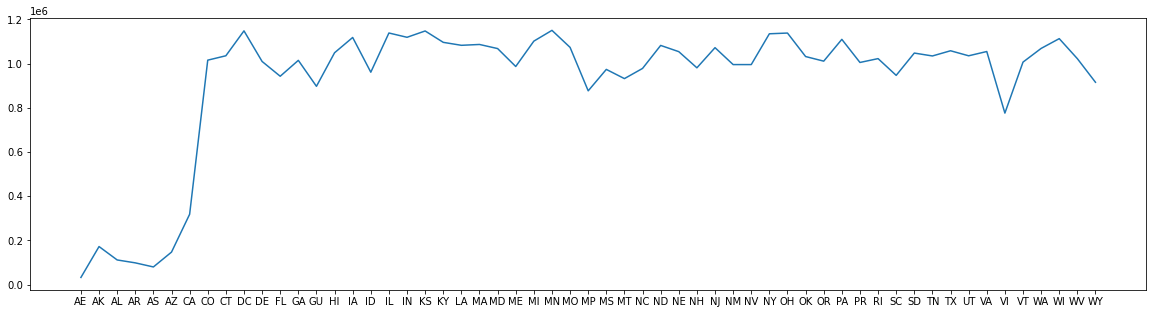

In [57]:
plt.figure(figsize=(20,5))
plt.plot(loan_amount_avg_state)
plt.show()

## National Average

In [58]:
project_Country_avg_loan=ppp_combo_data.groupby('ProjectCountyName')[['TotalLoanAmount']].agg('mean')
project_Country_avg_loan

,TotalLoanAmount
ProjectCountyName,
ABBEVILLE,1.546903e+06
ACADIA,1.001983e+06
ACCOMACK,7.124247e+05
ADA,1.046091e+06
ADAIR,1.254251e+06
...,...
YUBA,2.753174e+05
YUKON KOYUKUK,6.775475e+04
YUMA,1.767311e+05


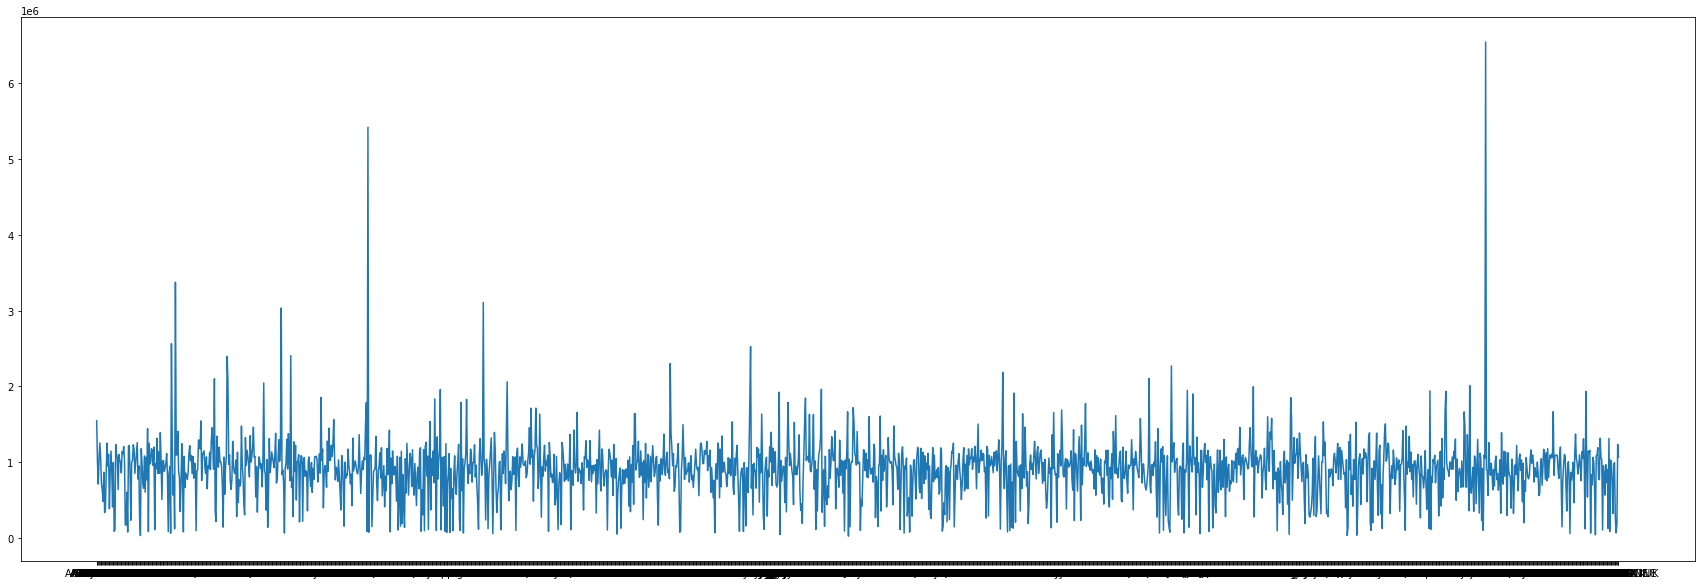

In [59]:
plt.figure(figsize=(30,10))
plt.plot(project_Country_avg_loan)
plt.show()

## Average loan for a particular city

In [60]:
loan_amount_avg_state

,TotalLoanAmount
BorrowerState,
AE,3.199350e+04
AK,1.718265e+05
AL,1.111937e+05
AR,9.804903e+04
AS,7.950905e+04
AZ,1.467413e+05
CA,3.179062e+05
CO,1.015571e+06
CT,1.035410e+06


In [61]:
ppp_combo_data.columns

Index(['LoanNumber', 'DateApproved', 'SBAOfficeCode', 'ProcessingMethod',
       'BorrowerCity', 'BorrowerState', 'LoanStatus', 'Term',
       'SBAGuarantyPercentage', 'InitialApprovalAmount',
       'CurrentApprovalAmount', 'TotalLoanAmount', 'ServicingLenderName',
       'ServicingLenderAddress', 'ServicingLenderCity', 'ServicingLenderState',
       'RuralUrbanIndicator', 'HubzoneIndicator', 'ProjectCity',
       'ProjectCountyName', 'ProjectState', 'JobsReported', 'Race',
       'Ethnicity', 'BusinessType', 'Gender', 'Veteran'],
      dtype='object')

## Loan Amount grouped by other KPIs like Business Type, Race,Gender etc

In [62]:
dc=ppp_combo_data.groupby(['TotalLoanAmount','BusinessType','Race','Gender'])
dc.first()

LoanNumber  \
TotalLoanAmount BusinessType                    Race       Gender                     
20.0            Limited  Liability Company(LLC) Unanswered Unanswered    7473747300   
50.0            Sole Proprietorship             Unanswered Unanswered    1044497400   
70.0            Sole Proprietorship             Unanswered Unanswered    6478077305   
82.0            Limited  Liability Company(LLC) Unanswered Unanswered    9425698103   
88.0            Limited  Liability Company(LLC) Unanswered Unanswered    5029447407   
...                                                                             ...   
20000000.0      Subchapter S Corporation        Unanswered Unanswered    5201397103   
                                                White      Female Owned  1752647202   
                                                           Male Owned    2886767410   
                                                           Unanswered    7244777109   
                Trust                           Unanswered Unanswered    8808617402   

                                                                        DateApproved  \
TotalLoanAmount BusinessType                    Race       Gender                      
20.0            Limited  Liability Company(LLC) Unanswered Unanswered     04/30/2020   
50.0            Sole Proprietorship             Unanswered Unanswered     05/03/2020   
70.0            Sole Proprietorship             Unanswered Unanswered     04/30/2020   
82.0            Limited  Liability Company(LLC) Unanswered Unanswered     07/28/2020   
88.0            Limited  Liability Company(LLC) Unanswered Unanswered     05/11/2020   
...                                                                              ...   
20000000.0      Subchapter S Corporation        Unanswered Unanswered     04/13/2020   
                                                White      Female Owned   04/15/2020   
                                                           Male Owned     05/06/2020   
                                                           Unanswered     04/14/2020   
                Trust                           Unanswered Unanswered     05/19/2020   

                                                                         SBAOfficeCode  \
TotalLoanAmount BusinessType                    Race       Gender                        
20.0            Limited  Liability Company(LLC) Unanswered Unanswered            988.0   
50.0            Sole Proprietorship             Unanswered Unanswered            988.0   
70.0            Sole Proprietorship             Unanswered Unanswered            988.0   
82.0            Limited  Liability Company(LLC) Unanswered Unanswered            988.0   
88.0            Limited  Liability Company(LLC) Unanswered Unanswered            459.0   
...                                                                                ...   
20000000.0      Subchapter S Corporation        Unanswered Unanswered            459.0   
                                                White      Female Owned          515.0   
                                                           Male Owned            459.0   
                                                           Unanswered            766.0   
                Trust                           Unanswered Unanswered            811.0   

                                                                        ProcessingMethod  \
TotalLoanAmount BusinessType                    Race       Gender                          
20.0            Limited  Liability Company(LLC) Unanswered Unanswered                PPP   
50.0            Sole Proprietorship             Unanswered Unanswered                PPP   
70.0            Sole Proprietorship             Unanswered Unanswered                PPP   
82.0            Limited  Liability Company(LLC) Unanswered Unanswered                PPP   
88.0            Limited  Liability Company(LLC) Unanswered Unanswered    

## Find a linear/non-linear relation between number of jobs reported and loan amount

## Using Scatter Plot

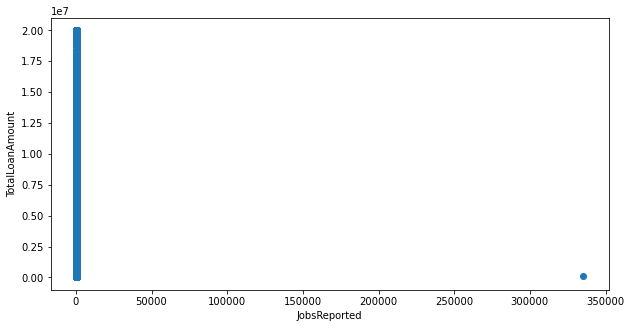

In [63]:
plt.figure(figsize=(10,5))
plt.scatter(x=ppp_combo_data.JobsReported,y=ppp_combo_data.TotalLoanAmount)
plt.xlabel('JobsReported')
plt.ylabel('TotalLoanAmount')
plt.show()

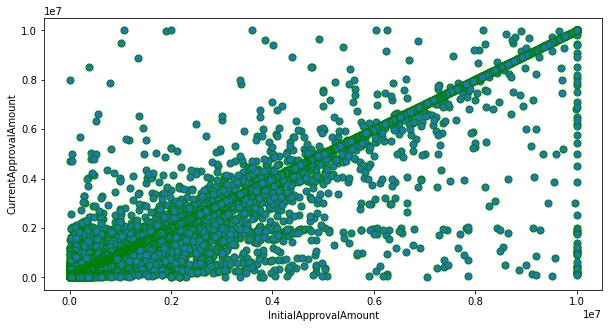

In [64]:
plt.figure(figsize=(10,5))
plt.scatter(x=ppp_combo_data.InitialApprovalAmount,y=ppp_combo_data.CurrentApprovalAmount,s=50,edgecolors='green')
plt.xlabel('InitialApprovalAmount')
plt.ylabel('CurrentApprovalAmount')
plt.show()

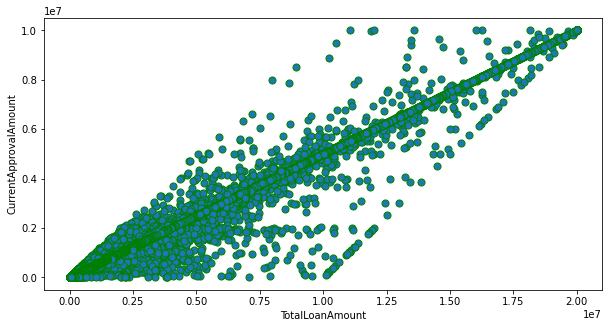

In [65]:
plt.figure(figsize=(10,5))
plt.scatter(x=ppp_combo_data.TotalLoanAmount,y=ppp_combo_data.CurrentApprovalAmount,s=50,edgecolors='green')
plt.xlabel('TotalLoanAmount')
plt.ylabel('CurrentApprovalAmount')
plt.show()

## Amount of loan given by each lender etc.

In [66]:
ppp_combo_data.ServicingLenderName

0                                  Synovus Bank
1                                  Synovus Bank
2         Bank of America, National Association
3         Bank of America, National Association
4                  The Huntington National Bank
                          ...                  
899995      Harvest Small Business Finance, LLC
899996      Harvest Small Business Finance, LLC
899997                         Cross River Bank
899998      Harvest Small Business Finance, LLC
899999                           Customers Bank
Name: ServicingLenderName, Length: 1868531, dtype: object

In [67]:
ppp_combo_data.groupby('ServicingLenderName')[['TotalLoanAmount']].agg(['count','mean','median'])

TotalLoanAmount                \
                                                          count          mean   
ServicingLenderName                                                             
\tFarm Credit Services of Western Arkansas, ACA             666  2.993844e+04   
\tYankee Farm Credit, ACA                                    10  1.035985e+06   
121 Financial CU                                             77  7.545805e+05   
1st Advantage Bank                                           49  8.386908e+05   
1st Advantage FCU                                             5  6.045539e+05   
...                                                         ...           ...   
farmbank                                                      2  7.206260e+05   
i3 Bank                                                      37  9.146929e+05   
iTHINK Financial CU                                         165  5.139774e+05   
immito, LLC                                                 122  8.240521e+05   
the Farmers State Bank of Bucklin, Kansas                     2  6.392880e+05   

                                                            
                                                    median  
ServicingLenderName                                         
\tFarm Credit Services of Western Arkansas, ACA   40024.25  
\tYankee Farm Credit, ACA                        537805.49  
121 Financial CU                                 501000.00  
1st Advantage Bank                               500000.00  
1st Advantage FCU                                451543.26  
...                                                    ...  
farmbank                                         720626.02  
i3 Bank                                          591200.00  
iTHINK Financial CU                              419800.00  
immito, LLC                                      449600.00  
the Farmers State Bank of Bucklin, Kansas        639288.00  

[4287 rows x 3 columns]

## CITY:
## City wise distribution of businesses granted loans.


In [68]:
ppp_combo_data.columns

Index(['LoanNumber', 'DateApproved', 'SBAOfficeCode', 'ProcessingMethod',
       'BorrowerCity', 'BorrowerState', 'LoanStatus', 'Term',
       'SBAGuarantyPercentage', 'InitialApprovalAmount',
       'CurrentApprovalAmount', 'TotalLoanAmount', 'ServicingLenderName',
       'ServicingLenderAddress', 'ServicingLenderCity', 'ServicingLenderState',
       'RuralUrbanIndicator', 'HubzoneIndicator', 'ProjectCity',
       'ProjectCountyName', 'ProjectState', 'JobsReported', 'Race',
       'Ethnicity', 'BusinessType', 'Gender', 'Veteran'],
      dtype='object')

In [69]:
vc=ppp_combo_data.groupby(['ProjectCity','TotalLoanAmount'])
vc.first()

LoanNumber DateApproved  \
ProjectCity                         TotalLoanAmount                            
(North Hollywood Area), Los Angeles 192582.0         7566817002   04/07/2020   
, Albany                            402200.0         8224617006   04/08/2020   
, Brooklyn                          409600.0         4515947808   05/28/2020   
                                    480200.0         4869117204   04/27/2020   
02155                               1886800.0        9920667106   04/15/2020   
...                                                         ...          ...   
yuma                                139548.0         8482687705   05/01/2020   
                                    192400.0         7988187210   04/28/2020   
                                    350600.0         5273057203   04/27/2020   
                                    443800.0         5162917307   04/30/2020   
zionsville                          991904.0         6431387209   04/28/2020   

                                                     SBAOfficeCode  \
ProjectCity                         TotalLoanAmount                  
(North Hollywood Area), Los Angeles 192582.0                 914.0   
, Albany                            402200.0                 202.0   
, Brooklyn                          409600.0                 202.0   
                                    480200.0                 202.0   
02155                               1886800.0                101.0   
...                                                            ...   
yuma                                139548.0                 988.0   
                                    192400.0                 988.0   
                                    350600.0                 988.0   
                                    443800.0                 988.0   
zionsville                          991904.0                 562.0   

                                                    ProcessingMethod  \
ProjectCity                         TotalLoanAmount                    
(North Hollywood Area), Los Angeles 192582.0                     PPP   
, Albany                            402200.0                     PPP   
, Brooklyn                          409600.0                     PPP   
                                    480200.0                     PPP   
02155                               1886800.0                    PPP   
...                                                              ...   
yuma                                139548.0                     PPP   
                                    192400.0                     PPP   
                                    350600.0                     PPP   
                                    443800.0                     PPP   
zionsville                          991904.0                     PPP   

                                                                            BorrowerCity  \
ProjectCity                         TotalLoanAmount                                        
(North Hollywood Area), Los Angeles 192582.0         (North Hollywood Area), Los Angeles   
, Albany                            402200.0                                    , Albany   
, Brooklyn                          409600.0                                  , Brooklyn   
                                    480200.0                                  , Brooklyn   
02155                               1886800.0                                      02155   
...                                                                                  ...   
yuma                                139548.0                                        yuma   
                                    192400.0                                        yuma   
                                    350600.0                                        yuma   
                                    443800.0                                        yuma   
zionsville                          991904.0                

## Highest loan lender in each city

In [70]:
ppp_combo_data.sort_values('TotalLoanAmount')

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerCity,BorrowerState,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,...,HubzoneIndicator,ProjectCity,ProjectCountyName,ProjectState,JobsReported,Race,Ethnicity,BusinessType,Gender,Veteran
429776,7473747300,04/30/2020,988.0,PPP,PHOENIX,AZ,Paid in Full,24,100,10.0,...,N,PHOENIX,MARICOPA,AZ,8.0,Unanswered,Unknown/NotStated,Limited Liability Company(LLC),Unanswered,Unanswered
429775,1044497400,05/03/2020,988.0,PPP,TEMPE,AZ,Paid in Full,24,100,25.0,...,N,TEMPE,MARICOPA,AZ,6.0,Unanswered,Unknown/NotStated,Sole Proprietorship,Unanswered,Unanswered
429774,6478077305,04/30/2020,988.0,PPP,KINGMAN,AZ,Paid in Full,24,100,35.0,...,N,KINGMAN,MOHAVE,AZ,1.0,Unanswered,Unknown/NotStated,Sole Proprietorship,Unanswered,Unanswered
429773,9425698103,07/28/2020,988.0,PPP,ANTHEM,AZ,Paid in Full,60,100,41.0,...,N,ANTHEM,MARICOPA,AZ,5.0,Unanswered,Unknown/NotStated,Limited Liability Company(LLC),Unanswered,Unanswered
179834,5029447407,05/11/2020,459.0,PPP,Roanoke,AL,Paid in Full,24,100,44.0,...,Y,Roanoke,RANDOLPH,AL,1.0,Unanswered,Unknown/NotStated,Limited Liability Company(LLC),Unanswered,Unanswered
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35286,4152297705,05/01/2020,920.0,PPP,TUSTIN,CA,Paid in Full,60,100,10000000.0,...,N,TUSTIN,ORANGE,CA,500.0,White,Not Hispanic or Latino,Corporation,Unanswered,Unanswered
35285,4048268605,03/17/2021,914.0,PPP,El Segundo,CA,Exemption 4,60,100,10000000.0,...,N,El Segundo,LOS ANGELES,CA,500.0,Unanswered,Unknown/NotStated,Limited Liability Company(LLC),Unanswered,Unanswered
35284,3963068810,04/15/2021,954.0,PPP,San Diego,CA,Paid in Full,60,100,10000000.0,...,N,San Diego,SAN DIEGO,CA,500.0,Unanswered,Unknown/NotStated,Sole Proprietorship,Unanswered,Unanswered
35294,4906607002,04/04/2020,912.0,PPP,REDWOOD CITY,CA,Paid in Full,24,100,10000000.0,...,N,REDWOOD CITY,SAN MATEO,CA,499.0,Unanswered,Unknown/NotStated,Corporation,Unanswered,Unanswered


In [71]:
ppp_combo_data.sort_values('TotalLoanAmount').ProjectCity

429776         PHOENIX
429775           TEMPE
429774         KINGMAN
429773          ANTHEM
179834         Roanoke
              ...     
35286           TUSTIN
35285       El Segundo
35284        San Diego
35294     REDWOOD CITY
305490           BOISE
Name: ProjectCity, Length: 1868531, dtype: object

## Compare cities on the basis of loan amounts etc.

In [72]:
compararing_loans=ppp_combo_data.sort_values('TotalLoanAmount')
compararing_loans.ProjectCity

429776         PHOENIX
429775           TEMPE
429774         KINGMAN
429773          ANTHEM
179834         Roanoke
              ...     
35286           TUSTIN
35285       El Segundo
35284        San Diego
35294     REDWOOD CITY
305490           BOISE
Name: ProjectCity, Length: 1868531, dtype: object

In [73]:
vc=compararing_loans.groupby(['ProjectCity','TotalLoanAmount'])
vc.first()

LoanNumber DateApproved  \
ProjectCity                         TotalLoanAmount                            
(North Hollywood Area), Los Angeles 192582.0         7566817002   04/07/2020   
, Albany                            402200.0         8224617006   04/08/2020   
, Brooklyn                          409600.0         4515947808   05/28/2020   
                                    480200.0         4869117204   04/27/2020   
02155                               1886800.0        9920667106   04/15/2020   
...                                                         ...          ...   
yuma                                139548.0         8482687705   05/01/2020   
                                    192400.0         7988187210   04/28/2020   
                                    350600.0         5273057203   04/27/2020   
                                    443800.0         5162917307   04/30/2020   
zionsville                          991904.0         6431387209   04/28/2020   

                                                     SBAOfficeCode  \
ProjectCity                         TotalLoanAmount                  
(North Hollywood Area), Los Angeles 192582.0                 914.0   
, Albany                            402200.0                 202.0   
, Brooklyn                          409600.0                 202.0   
                                    480200.0                 202.0   
02155                               1886800.0                101.0   
...                                                            ...   
yuma                                139548.0                 988.0   
                                    192400.0                 988.0   
                                    350600.0                 988.0   
                                    443800.0                 988.0   
zionsville                          991904.0                 562.0   

                                                    ProcessingMethod  \
ProjectCity                         TotalLoanAmount                    
(North Hollywood Area), Los Angeles 192582.0                     PPP   
, Albany                            402200.0                     PPP   
, Brooklyn                          409600.0                     PPP   
                                    480200.0                     PPP   
02155                               1886800.0                    PPP   
...                                                              ...   
yuma                                139548.0                     PPP   
                                    192400.0                     PPP   
                                    350600.0                     PPP   
                                    443800.0                     PPP   
zionsville                          991904.0                     PPP   

                                                                            BorrowerCity  \
ProjectCity                         TotalLoanAmount                                        
(North Hollywood Area), Los Angeles 192582.0         (North Hollywood Area), Los Angeles   
, Albany                            402200.0                                    , Albany   
, Brooklyn                          409600.0                                  , Brooklyn   
                                    480200.0                                  , Brooklyn   
02155                               1886800.0                                      02155   
...                                                                                  ...   
yuma                                139548.0                                        yuma   
                                    192400.0                                        yuma   
                                    350600.0                                        yuma   
                                    443800.0                                        yuma   
zionsville                          991904.0                

## BUSINESS TYPE :-
## Number of jobs reported by different business types.


In [74]:
no_of_jobs=ppp_combo_data.groupby(['JobsReported','BusinessType'])
no_of_jobs.first()

LoanNumber DateApproved  \
JobsReported BusinessType                                               
-6.0         Sole Proprietorship              4438388209   08/06/2020   
 0.0         Corporation                      5780187005   04/06/2020   
             Limited  Liability Company(LLC)  4864227203   04/27/2020   
             Non-Profit Organization          6557167306   04/30/2020   
             Sole Proprietorship              1958957305   04/28/2020   
...                                                  ...          ...   
 500.0       Self-Employed Individuals        3527567706   05/01/2020   
             Sole Proprietorship              1048448901   04/24/2021   
             Subchapter S Corporation         7054477003   04/07/2020   
             Trust                            1148027306   04/28/2020   
 335258.0    Corporation                      4953687704   05/03/2020   

                                              SBAOfficeCode ProcessingMethod  \
JobsReported BusinessType                                                      
-6.0         Sole Proprietorship                     1084.0              PPP   
 0.0         Corporation                              766.0              PPP   
             Limited  Liability Company(LLC)          303.0              PPP   
             Non-Profit Organization                  914.0              PPP   
             Sole Proprietorship                      912.0              PPP   
...                                                     ...              ...   
 500.0       Self-Employed Individuals                988.0              PPP   
             Sole Proprietorship                      912.0              PPP   
             Subchapter S Corporation                1084.0              PPP   
             Trust                                    942.0              PPP   
 335258.0    Corporation                              912.0              PPP   

                                              BorrowerCity BorrowerState  \
JobsReported BusinessType                                                  
-6.0         Sole Proprietorship                    Hoonah            AK   
 0.0         Corporation                           Lincoln            NE   
             Limited  Liability Company(LLC)  Philadelphia            PA   
             Non-Profit Organization                LOMITA            CA   
             Sole Proprietorship                  San Jose            CA   
...                                                    ...           ...   
 500.0       Self-Employed Individuals             Phoenix            AZ   
             Sole Proprietorship                Pleasanton            CA   
             Subchapter S Corporation            ANCHORAGE            AK   
             Trust                                 SALINAS            CA   
 335258.0    Corporation                          SAN JOSE            CA   

                                                LoanStatus  Term  \
JobsReported BusinessType                                          
-6.0         Sole Proprietorship              Paid in Full    60   
 0.0         Corporation                      Paid in Full    24   
             Limited  Liability Company(LLC)  Paid in Full    24   
             Non-Profit Organization          Paid in Full    24   
             Sole Proprietorship              Paid in Full    24   
...                                                    ...   ...   
 500.0       Self-Employed Individuals         Exemption 4     5   
             Sole Proprietorship              Paid in Full    60   
             Subchapter S Corporation         Paid in Full    24   
             Trust                            Paid in Full    24   
 335258.0    Corporation                       Exemption 4    24   

                                              SBAGuarantyPercentage  \
JobsReported BusinessType                                             
-6.0         Sole Proprietorship       

## Average Loan Amount per business type

In [75]:
loan_amount_avg_state

,TotalLoanAmount
BorrowerState,
AE,3.199350e+04
AK,1.718265e+05
AL,1.111937e+05
AR,9.804903e+04
AS,7.950905e+04
AZ,1.467413e+05
CA,3.179062e+05
CO,1.015571e+06
CT,1.035410e+06


In [76]:
loan_amount_avg_state.TotalLoanAmount

BorrowerState
AE    3.199350e+04
AK    1.718265e+05
AL    1.111937e+05
AR    9.804903e+04
AS    7.950905e+04
AZ    1.467413e+05
CA    3.179062e+05
CO    1.015571e+06
CT    1.035410e+06
DC    1.148165e+06
DE    1.009677e+06
FL    9.427150e+05
GA    1.014647e+06
GU    8.971331e+05
HI    1.049048e+06
IA    1.118222e+06
ID    9.610597e+05
IL    1.138491e+06
IN    1.119070e+06
KS    1.147657e+06
KY    1.096163e+06
LA    1.082768e+06
MA    1.086587e+06
MD    1.068016e+06
ME    9.868742e+05
MI    1.101707e+06
MN    1.150457e+06
MO    1.073344e+06
MP    8.766857e+05
MS    9.736850e+05
MT    9.320540e+05
NC    9.781327e+05
ND    1.082224e+06
NE    1.054036e+06
NH    9.809012e+05
NJ    1.072083e+06
NM    9.955271e+05
NV    9.954879e+05
NY    1.134954e+06
OH    1.138226e+06
OK    1.031919e+06
OR    1.011046e+06
PA    1.109681e+06
PR    1.005123e+06
RI    1.022544e+06
SC    9.467310e+05
SD    1.047655e+06
TN    1.034544e+06
TX    1.058079e+06
UT    1.035314e+06
VA    1.054682e+06
VI    7.759108e+0

In [77]:
ppp_combo_data.BusinessType

0                       Corporation
1               Sole Proprietorship
2           Non-Profit Organization
3                       Corporation
4                       Corporation
                    ...            
899995          Sole Proprietorship
899996    Self-Employed Individuals
899997          Sole Proprietorship
899998          Sole Proprietorship
899999          Sole Proprietorship
Name: BusinessType, Length: 1868531, dtype: object

## DATE APPROVED:
## Find months in which high amount of loans were sanctioned.


In [78]:
ppp_combo_data.columns

Index(['LoanNumber', 'DateApproved', 'SBAOfficeCode', 'ProcessingMethod',
       'BorrowerCity', 'BorrowerState', 'LoanStatus', 'Term',
       'SBAGuarantyPercentage', 'InitialApprovalAmount',
       'CurrentApprovalAmount', 'TotalLoanAmount', 'ServicingLenderName',
       'ServicingLenderAddress', 'ServicingLenderCity', 'ServicingLenderState',
       'RuralUrbanIndicator', 'HubzoneIndicator', 'ProjectCity',
       'ProjectCountyName', 'ProjectState', 'JobsReported', 'Race',
       'Ethnicity', 'BusinessType', 'Gender', 'Veteran'],
      dtype='object')

In [79]:
date_approved_per_loan=ppp_combo_data.groupby(['DateApproved','TotalLoanAmount'])
date_approved_per_loan.first()

LoanNumber  SBAOfficeCode ProcessingMethod  \
DateApproved TotalLoanAmount                                               
01/13/2021   20151.64         9909948200          459.0              PPP   
             41600.00         9909548209          669.0              PPP   
             41665.00         9909938208          669.0              PPP   
             41666.64         9911978208          912.0              PPP   
             42139.60         9911418204          914.0              PPP   
...                                  ...            ...              ...   
08/08/2020   20000000.00      5615278207          679.0              PPP   
12/08/2020   1809052.00       6623207108          470.0              PPP   
             2123004.50       7007237107          669.0              PPP   
             2889822.00       9308647104          470.0              PPP   
12/14/2020   1922969.50       7190847110          669.0              PPP   

                               BorrowerCity BorrowerState    LoanStatus  Term  \
DateApproved TotalLoanAmount                                                    
01/13/2021   20151.64           Robertsdale            AL  Paid in Full    60   
             41600.00          Lake Village            AR  Paid in Full    60   
             41665.00                Wilmar            AR  Paid in Full    60   
             41666.64         San Francisco            CA  Paid in Full    60   
             42139.60           Los Angeles            CA  Paid in Full    60   
...                                     ...           ...           ...   ...   
08/08/2020   20000000.00             GRETNA            LA  Paid in Full    60   
12/08/2020   1809052.00            GULFPORT            MS  Paid in Full    60   
             2123004.50             HOUSTON            TX  Paid in Full    60   
             2889822.00            GULFPORT            MS  Paid in Full    60   
12/14/2020   1922969.50             HOUSTON            TX  Paid in Full    60   

                              SBAGuarantyPercentage  InitialApprovalAmount  \
DateApproved TotalLoanAmount                                                 
01/13/2021   20151.64                           100               10075.82   
             41600.00                           100               20800.00   
             41665.00                           100               20832.50   
             41666.64                           100               20833.32   
             42139.60                           100               21069.80   
...                                             ...                    ...   
08/08/2020   20000000.00                        100            10000000.00   
12/08/2020   1809052.00                         100             1107990.00   
             2123004.50                         100             1824057.50   
             2889822.00                         100             2279050.00   
12/14/2020   1922969.50                         100             1724187.50   

                              CurrentApprovalAmount  ... HubzoneIndicator  \
DateApproved TotalLoanAmount                         ...                    
01/13/2021   20151.64                      10075.82  ...                N   
             41600.00                      20800.00  ...                Y   
             41665.00                      20832.50  ...                N   
             41666.64                      20833.32  ...                N   
             42139.60                      21069.80  ...                N   
...                                             ...  ...              ...   
08/08/2020   20000000.00                10000000.00  ...                Y   
12/08/2020   1809052.00                   701062.00  ...                Y   
             2123004.50                   298947.00  ...                N   
             2889822.00                   610772.00  ...                Y   
12/14/2020   1922969.50                   198782

## Find how many jobs were reported in the past months and predicthow many could be reported in the upcoming months.

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as split

In [81]:
train,test=split(ppp_combo_data,test_size=0.25,random_state=123)

In [82]:
x_train=train.drop(columns='JobsReported')
y_train=train.JobsReported
x_test=test.drop(columns='JobsReported')
y_test=test.JobsReported

In [83]:
lr=LinearRegression()

In [84]:
ppp_combo_data.columns

Index(['LoanNumber', 'DateApproved', 'SBAOfficeCode', 'ProcessingMethod',
       'BorrowerCity', 'BorrowerState', 'LoanStatus', 'Term',
       'SBAGuarantyPercentage', 'InitialApprovalAmount',
       'CurrentApprovalAmount', 'TotalLoanAmount', 'ServicingLenderName',
       'ServicingLenderAddress', 'ServicingLenderCity', 'ServicingLenderState',
       'RuralUrbanIndicator', 'HubzoneIndicator', 'ProjectCity',
       'ProjectCountyName', 'ProjectState', 'JobsReported', 'Race',
       'Ethnicity', 'BusinessType', 'Gender', 'Veteran'],
      dtype='object')

## Find total number of loans approved in each month and use it for Time Series Forecasting to predict how many loans would be approved in the upcoming months etc.

## Time Series

In [85]:
import pandas as pd
fx=pd.read_csv('~/Downloads/public_150k_plus_220930.csv',parse_dates = ['DateApproved'], index_col='DateApproved')
fx = fx[::-1]
fx.head(3)

,LoanNumber,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,...,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
DateApproved,,,,,,,,,,,,,,,,,,,,,
2020-04-09,9184687004,897,PPP,S & S JOHNSON ENTERPRISES INC,7342 Granite Loop Rd,TETON VILLAGE,WY,83025-0550,10/22/2021,Paid in Full,...,Subchapter S Corporation,77193,Bank of Jackson Hole,JACKSON,WY,Unanswered,Unanswered,NaN,152162.50,09/22/2021
2020-04-15,9054647103,897,PPP,EDEN LIFE CARE,30 N. Gould Street Suite 4000,SHERIDAN,WY,82801,03/08/2022,Paid in Full,...,Corporation,25901,Small Business Bank,LENEXA,KS,Unanswered,Unanswered,NaN,152820.83,02/23/2022
2021-02-12,7996438405,897,PPS,ELECTRICAL SYSTEMS OF WYOMING INC,1105 Adon Rd,Rozet,WY,82727-8465,09/15/2021,Paid in Full,...,Subchapter S Corporation,77189,First National Bank of Gillette,GILLETTE,WY,Female Owned,Unanswered,NaN,150743.84,08/17/2021


In [86]:
fx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 968531 entries, 2020-04-09 to 2020-05-01
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   LoanNumber                   968531 non-null  int64  
 1   SBAOfficeCode                968531 non-null  int64  
 2   ProcessingMethod             968531 non-null  object 
 3   BorrowerName                 968527 non-null  object 
 4   BorrowerAddress              968517 non-null  object 
 5   BorrowerCity                 968519 non-null  object 
 6   BorrowerState                968518 non-null  object 
 7   BorrowerZip                  968518 non-null  object 
 8   LoanStatusDate               923250 non-null  object 
 9   LoanStatus                   968531 non-null  object 
 10  Term                         968531 non-null  int64  
 11  SBAGuarantyPercentage        968531 non-null  int64  
 12  InitialApprovalAmount        968531 non-nu

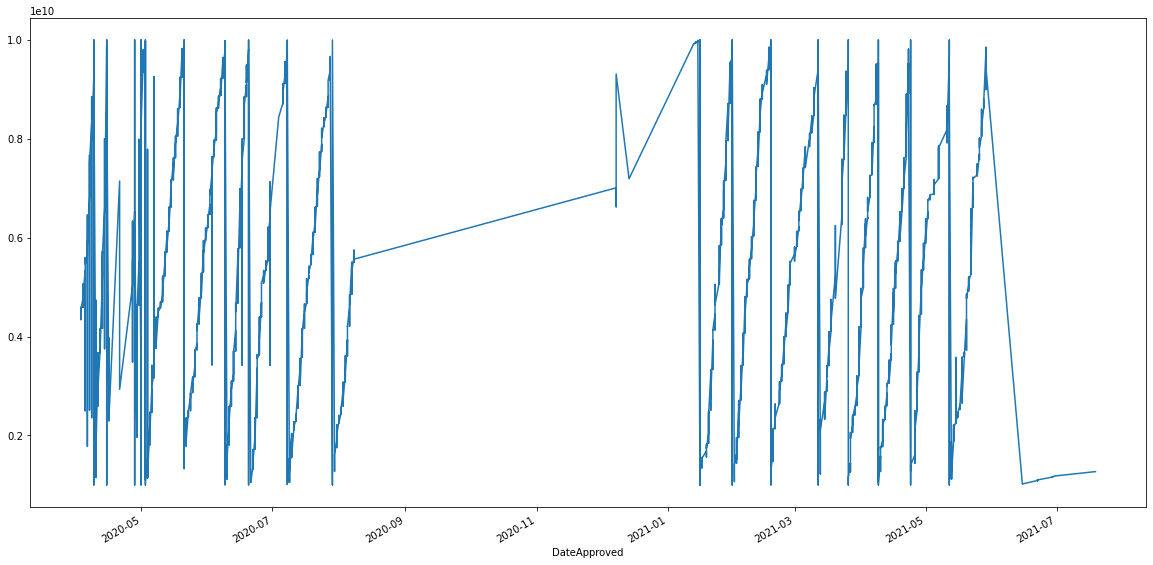

In [87]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
fx.LoanNumber.plot()
plt.show()

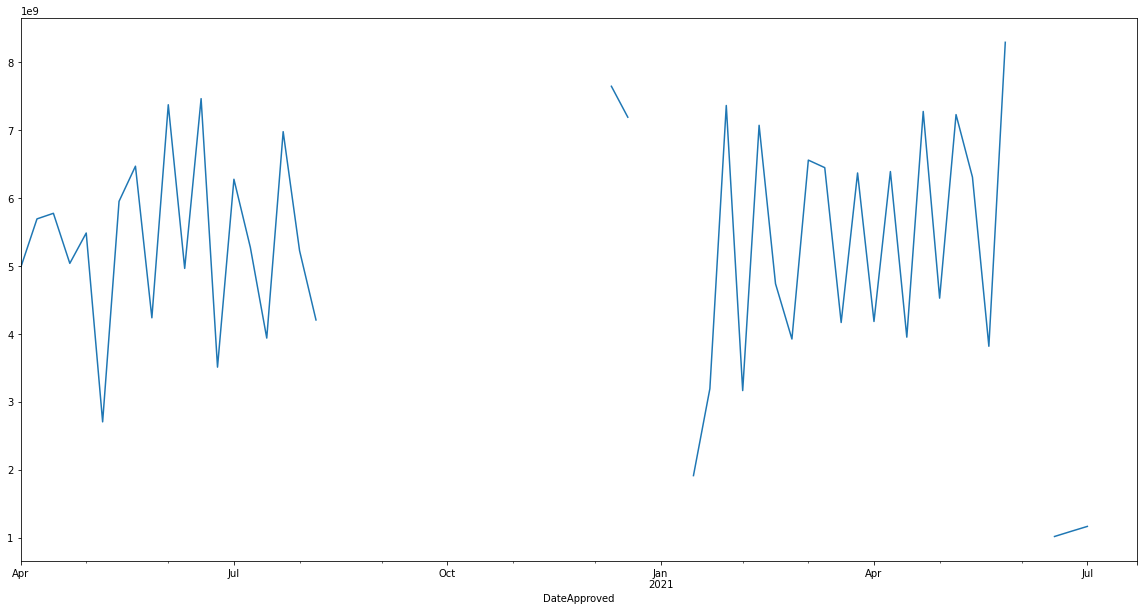

In [88]:
plt.figure(figsize=(20,10))
fxw = fx.LoanNumber.resample('W').mean()
fxw.plot()
plt.show()

In [89]:
fx['roll_mean'] = fx.LoanNumber.rolling(5).mean()
fx.head(10)

,LoanNumber,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,...,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,roll_mean
DateApproved,,,,,,,,,,,,,,,,,,,,,
2020-04-09,9184687004,897,PPP,S & S JOHNSON ENTERPRISES INC,7342 Granite Loop Rd,TETON VILLAGE,WY,83025-0550,10/22/2021,Paid in Full,...,77193,Bank of Jackson Hole,JACKSON,WY,Unanswered,Unanswered,NaN,152162.50,09/22/2021,NaN
2020-04-15,9054647103,897,PPP,EDEN LIFE CARE,30 N. Gould Street Suite 4000,SHERIDAN,WY,82801,03/08/2022,Paid in Full,...,25901,Small Business Bank,LENEXA,KS,Unanswered,Unanswered,NaN,152820.83,02/23/2022,NaN
2021-02-12,7996438405,897,PPS,ELECTRICAL SYSTEMS OF WYOMING INC,1105 Adon Rd,Rozet,WY,82727-8465,09/15/2021,Paid in Full,...,77189,First National Bank of Gillette,GILLETTE,WY,Female Owned,Unanswered,NaN,150743.84,08/17/2021,NaN
2020-04-14,6985647108,897,PPP,"SWEETWATER COUNTY CHILD DEVELOPMENTAL CENTER, ...",1715 HITCHING POST DR,GREEN RIVER,WY,82935-5783,12/08/2020,Paid in Full,...,122813,NebraskaLand Bank,NORTH PLATTE,NE,Unanswered,Unanswered,Y,150789.04,11/03/2020,NaN
2020-04-03,4395967002,897,PPP,"ROY E PAULSON, JR., P.C.",102 N. Kenwood,CASPER,WY,82601-2724,01/13/2021,Paid in Full,...,42366,Platte Valley Bank,TORRINGTON,WY,Male Owned,Non-Veteran,NaN,151037.50,12/09/2020,7.523477e+09
2021-01-21,2665238309,897,PPS,RHOADES DENTAL P.C.,17 S Seneca Ave,Newcastle,WY,82701-2816,08/06/2021,Paid in Full,...,77248,Pinnacle Bank-Wyoming,CODY,WY,Female Owned,Veteran,NaN,150661.64,07/12/2021,6.219588e+09
2021-01-20,2423908306,897,PPS,BSI SERVICES INC,680 Highway 414 E,Mountain View,WY,82939,10/26/2021,Paid in Full,...,77214,Uinta Bank,MOUNTAIN VIEW,WY,Male Owned,Unanswered,NaN,151079.17,10/12/2021,4.893440e+09
2021-01-20,2193718301,897,PPS,BASIC BEGINNINGS INC,1474 N 19th St,Laramie,WY,82072-2341,07/09/2021,Paid in Full,...,15169,ANB Bank,DENVER,CO,Female Owned,Non-Veteran,NaN,150575.34,06/15/2021,3.732896e+09
2021-03-27,1641268700,897,PPP,THERMAL TECHNOLOGY SERVICES LLC,30 N Gould St Ste R,Sheridan,WY,82801-6317,02/16/2022,Paid in Full,...,12096,"Wells Fargo Bank, National Association",SIOUX FALLS,SD,Unanswered,Unanswered,NaN,151047.95,12/10/2021,2.664020e+09


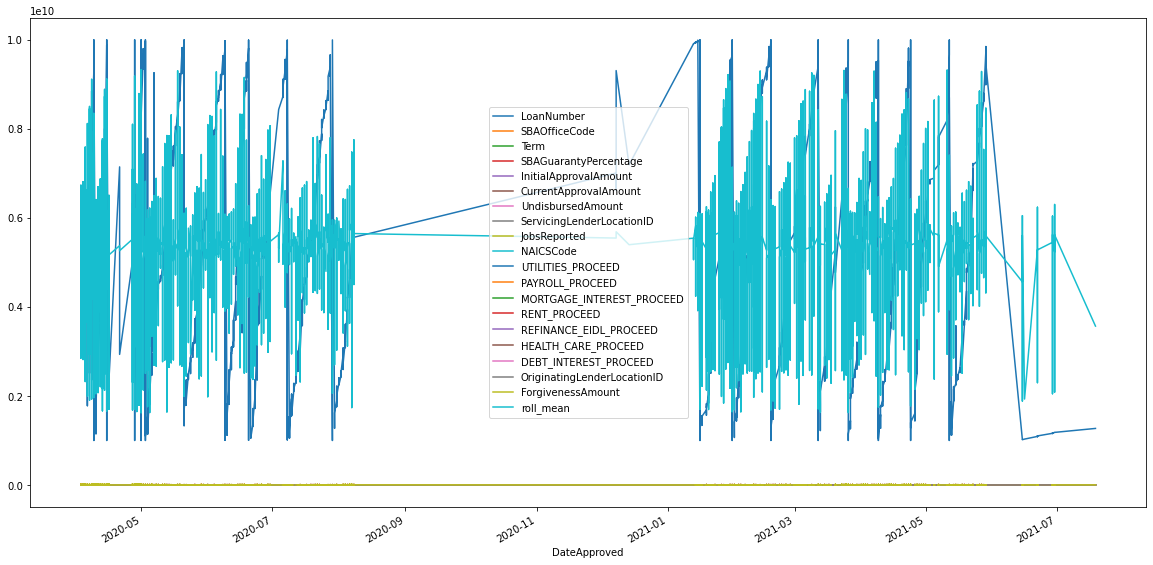

In [90]:
fx['roll_mean'] = fx.LoanNumber.rolling(200).mean()
fx.plot(figsize=(20,10))
plt.show()

## Test for Stationarity - Augmented Dickey Fuller Test¶
## p - value: How likely it is to get a result like this if null hypothesis is True
## Always look at p-value in context of null hypothesis
## Significance value (alpha): if p- value is below this value we will reject null hypothesis, often 0.05
## Null hypothesis of the dickey fuller test is that the value is Non-stationary
## So we reject the null hypothesis that data is Non-stationary if the p values is less than 0.05

In [91]:
from statsmodels.tsa.stattools import adfuller

In [92]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=52).mean() 
    rolstd = timeseries.rolling(window=52).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries)[1]
    print('p_value: ', dftest)

In [93]:
fxw.diff().diff().head()

DateApproved
2020-04-05             NaN
2020-04-12             NaN
2020-04-19   -6.404519e+08
2020-04-26   -8.191800e+08
2020-05-03    1.183452e+09
Freq: W-SUN, Name: LoanNumber, dtype: float64

### test_stationarity(fxw)

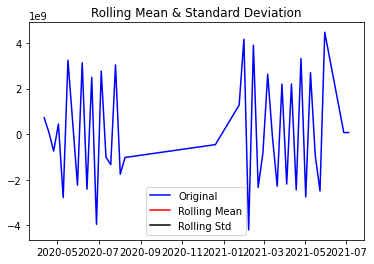

Results of Dickey-Fuller Test:
p_value:  2.9838743391951064e-13


In [94]:
test_stationarity(fxw.diff().dropna())